To define interactions in the Ising model, a hashtable of spin-to-connections and a hashtable of spins to J and gu will be constructed



In [7]:
spins_to_connections = dict()
spins_to_Jgu = dict()

For the current purposes, a square 2D antiferromagnetic system will be simulated

In [3]:
def produce__uniform_2D_antiferromagnetic_square(length, J, gu):
  neighbors = [[-1,0], [1,0], [0,-1], [0, 1]] # Possible 2D neighbors
  spins_to_connections = dict()
  spins_to_Jgu = dict()
  for i in range(length):
    for j in range(length):
      index = i*length + j # Formula for 2D index -> 1D index: (height*y + x)
      spins_to_connections[index] = []
      spins_to_Jgu[index] = [J, gu]
      for neighbor in neighbors:
        if(i + neighbor[0] >= 0 and i + neighbor[0] < length and
           j + neighbor[1] >= 0 and j + neighbor[1] < length):  # Check bounds
           new_index = (i + neighbor[0])*length + (j + neighbor[1])
           spins_to_connections[index].append(new_index)
  return spins_to_connections, spins_to_Jgu

length = 100
spins_to_connections, spins_to_Jgu = produce__uniform_2D_antiferromagnetic_square(length, -2, 1)

In [4]:
print(spins_to_connections)

{0: [100, 1], 1: [101, 0, 2], 2: [102, 1, 3], 3: [103, 2, 4], 4: [104, 3, 5], 5: [105, 4, 6], 6: [106, 5, 7], 7: [107, 6, 8], 8: [108, 7, 9], 9: [109, 8, 10], 10: [110, 9, 11], 11: [111, 10, 12], 12: [112, 11, 13], 13: [113, 12, 14], 14: [114, 13, 15], 15: [115, 14, 16], 16: [116, 15, 17], 17: [117, 16, 18], 18: [118, 17, 19], 19: [119, 18, 20], 20: [120, 19, 21], 21: [121, 20, 22], 22: [122, 21, 23], 23: [123, 22, 24], 24: [124, 23, 25], 25: [125, 24, 26], 26: [126, 25, 27], 27: [127, 26, 28], 28: [128, 27, 29], 29: [129, 28, 30], 30: [130, 29, 31], 31: [131, 30, 32], 32: [132, 31, 33], 33: [133, 32, 34], 34: [134, 33, 35], 35: [135, 34, 36], 36: [136, 35, 37], 37: [137, 36, 38], 38: [138, 37, 39], 39: [139, 38, 40], 40: [140, 39, 41], 41: [141, 40, 42], 42: [142, 41, 43], 43: [143, 42, 44], 44: [144, 43, 45], 45: [145, 44, 46], 46: [146, 45, 47], 47: [147, 46, 48], 48: [148, 47, 49], 49: [149, 48, 50], 50: [150, 49, 51], 51: [151, 50, 52], 52: [152, 51, 53], 53: [153, 52, 54], 54: [1

In [5]:
print(spins_to_Jgu)

{0: [-2, 1], 1: [-2, 1], 2: [-2, 1], 3: [-2, 1], 4: [-2, 1], 5: [-2, 1], 6: [-2, 1], 7: [-2, 1], 8: [-2, 1], 9: [-2, 1], 10: [-2, 1], 11: [-2, 1], 12: [-2, 1], 13: [-2, 1], 14: [-2, 1], 15: [-2, 1], 16: [-2, 1], 17: [-2, 1], 18: [-2, 1], 19: [-2, 1], 20: [-2, 1], 21: [-2, 1], 22: [-2, 1], 23: [-2, 1], 24: [-2, 1], 25: [-2, 1], 26: [-2, 1], 27: [-2, 1], 28: [-2, 1], 29: [-2, 1], 30: [-2, 1], 31: [-2, 1], 32: [-2, 1], 33: [-2, 1], 34: [-2, 1], 35: [-2, 1], 36: [-2, 1], 37: [-2, 1], 38: [-2, 1], 39: [-2, 1], 40: [-2, 1], 41: [-2, 1], 42: [-2, 1], 43: [-2, 1], 44: [-2, 1], 45: [-2, 1], 46: [-2, 1], 47: [-2, 1], 48: [-2, 1], 49: [-2, 1], 50: [-2, 1], 51: [-2, 1], 52: [-2, 1], 53: [-2, 1], 54: [-2, 1], 55: [-2, 1], 56: [-2, 1], 57: [-2, 1], 58: [-2, 1], 59: [-2, 1], 60: [-2, 1], 61: [-2, 1], 62: [-2, 1], 63: [-2, 1], 64: [-2, 1], 65: [-2, 1], 66: [-2, 1], 67: [-2, 1], 68: [-2, 1], 69: [-2, 1], 70: [-2, 1], 71: [-2, 1], 72: [-2, 1], 73: [-2, 1], 74: [-2, 1], 75: [-2, 1], 76: [-2, 1], 77: [-2,

First, we will construct a PyQubo spin simulation to ensure we produce the correct Hamiltonian

In [7]:
!pip install pyqubo

In [3]:
from pyqubo import Spin
import numpy as np

In [4]:
magneticField = np.array([0,0,1])

In [8]:
H = 0 # This will be our Hamiltonian
spins = [] # This will store our spins
for idx, neighbors in spins_to_connections.items(): # This creates our spins
  # 3x3 Square, so remainder and divisor gives us the 2D index
  idx_x = (idx // length) + 1
  idx_y = (idx % length) + 1
  spins.append(Spin("(" + str(idx_x) + ", " + str(idx_y) + ")"))

In [9]:
for idx, neighbors in spins_to_connections.items():
  # Now, we will add the Hamiltonian terms (note: we needed to initalize all spins first)
  [J, gu] = spins_to_Jgu[idx]
  H += -1 * magneticField[2] * gu * spins[idx]
  for neighbor in neighbors:
    H += -1 * spins[idx] * spins[neighbor] * J

Let us create the model object and examine the produced Hamiltonian

In [10]:
print(H)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
model = H.compile()

The computer reasons about the problem as a matrix + vector optimization wherein one seeks the vector which maximizes the sum of the quadratic and linear terms. The offset is there to lessen the energy spectrum's range for easy of computation.

$\min{(\hat{H})} = \min_{\overrightarrow{x}}{(\overrightarrow{x}^{T}Q\overrightarrow{x} + B\overrightarrow{x} + \overrightarrow{x}{o})}$

In [12]:
linear, quadratic, offset = model.to_ising()

In [13]:
print(linear)

{'(99, 99)': -1.0, '(99, 96)': -1.0, '(99, 92)': -1.0, '(99, 89)': -1.0, '(99, 85)': -1.0, '(99, 84)': -1.0, '(99, 82)': -1.0, '(99, 81)': -1.0, '(99, 77)': -1.0, '(99, 75)': -1.0, '(99, 74)': -1.0, '(99, 7)': -1.0, '(99, 68)': -1.0, '(99, 67)': -1.0, '(99, 65)': -1.0, '(99, 63)': -1.0, '(99, 6)': -1.0, '(99, 59)': -1.0, '(99, 54)': -1.0, '(99, 53)': -1.0, '(99, 50)': -1.0, '(99, 47)': -1.0, '(99, 41)': -1.0, '(99, 40)': -1.0, '(99, 37)': -1.0, '(99, 36)': -1.0, '(99, 35)': -1.0, '(99, 34)': -1.0, '(99, 31)': -1.0, '(99, 29)': -1.0, '(99, 28)': -1.0, '(99, 25)': -1.0, '(99, 22)': -1.0, '(99, 20)': -1.0, '(99, 15)': -1.0, '(99, 13)': -1.0, '(99, 11)': -1.0, '(99, 100)': -1.0, '(99, 1)': -1.0, '(98, 99)': -1.0, '(98, 97)': -1.0, '(98, 94)': -1.0, '(98, 92)': -1.0, '(98, 91)': -1.0, '(98, 89)': -1.0, '(98, 88)': -1.0, '(99, 9)': -1.0, '(98, 86)': -1.0, '(98, 82)': -1.0, '(98, 81)': -1.0, '(98, 80)': -1.0, '(98, 8)': -1.0, '(98, 78)': -1.0, '(98, 77)': -1.0, '(98, 75)': -1.0, '(98, 70)': -

In [14]:
print(quadratic)

{('(99, 97)', '(99, 98)'): 4.0, ('(99, 95)', '(99, 96)'): 4.0, ('(99, 87)', '(99, 88)'): 4.0, ('(99, 81)', '(99, 82)'): 4.0, ('(99, 78)', '(99, 79)'): 4.0, ('(99, 77)', '(99, 78)'): 4.0, ('(99, 75)', '(99, 76)'): 4.0, ('(99, 70)', '(99, 71)'): 4.0, ('(99, 7)', '(99, 8)'): 4.0, ('(99, 69)', '(99, 70)'): 4.0, ('(99, 61)', '(99, 62)'): 4.0, ('(99, 60)', '(99, 61)'): 4.0, ('(99, 58)', '(99, 59)'): 4.0, ('(99, 56)', '(99, 57)'): 4.0, ('(99, 54)', '(99, 55)'): 4.0, ('(99, 5)', '(99, 6)'): 4.0, ('(99, 49)', '(99, 50)'): 4.0, ('(99, 47)', '(99, 48)'): 4.0, ('(99, 41)', '(99, 42)'): 4.0, ('(99, 4)', '(99, 5)'): 4.0, ('(99, 39)', '(99, 40)'): 4.0, ('(99, 37)', '(99, 38)'): 4.0, ('(99, 34)', '(99, 35)'): 4.0, ('(99, 33)', '(99, 34)'): 4.0, ('(99, 27)', '(99, 28)'): 4.0, ('(99, 26)', '(99, 27)'): 4.0, ('(99, 22)', '(99, 23)'): 4.0, ('(99, 21)', '(99, 22)'): 4.0, ('(99, 18)', '(99, 19)'): 4.0, ('(99, 17)', '(99, 18)'): 4.0, ('(99, 13)', '(99, 14)'): 4.0, ('(99, 1)', '(99, 2)'): 4.0, ('(98, 98)', '(

In [15]:
print(offset)

0.0


Let us try Simulated Annealing to see if we reproduce the expected result (using binary quadratic model)

In [16]:
bqm = model.to_bqm()

In [17]:
import neal
sa = neal.SimulatedAnnealingSampler()
sampleset = sa.sample(bqm, num_reads=10)
decoded_samples = model.decode_sampleset(sampleset)
best_sample = min(decoded_samples, key=lambda x: x.energy).sample

In [18]:
print(best_sample)

{'(99, 99)': 1, '(99, 96)': 0, '(99, 92)': 0, '(99, 89)': 1, '(99, 85)': 1, '(99, 84)': 0, '(99, 82)': 0, '(99, 81)': 1, '(99, 77)': 1, '(99, 75)': 1, '(99, 74)': 0, '(99, 7)': 1, '(99, 68)': 0, '(99, 67)': 1, '(99, 65)': 1, '(99, 63)': 1, '(99, 6)': 0, '(99, 59)': 1, '(99, 54)': 0, '(99, 53)': 1, '(99, 50)': 0, '(99, 47)': 1, '(99, 41)': 1, '(99, 40)': 0, '(99, 37)': 1, '(99, 36)': 0, '(99, 35)': 1, '(99, 34)': 0, '(99, 31)': 1, '(99, 29)': 1, '(99, 28)': 0, '(99, 25)': 1, '(99, 22)': 0, '(99, 20)': 0, '(99, 15)': 1, '(99, 13)': 1, '(99, 11)': 1, '(99, 100)': 0, '(99, 1)': 1, '(98, 99)': 0, '(98, 97)': 0, '(98, 94)': 1, '(98, 92)': 1, '(98, 91)': 0, '(98, 89)': 0, '(98, 88)': 1, '(99, 9)': 1, '(98, 86)': 1, '(98, 82)': 1, '(98, 81)': 0, '(98, 80)': 1, '(98, 8)': 1, '(98, 78)': 1, '(98, 77)': 0, '(98, 75)': 0, '(98, 70)': 1, '(98, 67)': 0, '(98, 66)': 1, '(98, 65)': 0, '(98, 60)': 1, '(98, 6)': 1, '(98, 57)': 0, '(98, 56)': 1, '(98, 52)': 1, '(98, 50)': 1, '(98, 49)': 0, '(98, 47)': 0,

Let us visualize the found solution

In [ ]:
data = [[0 for j in range(length)] for i in range(length)]
for key, value in best_sample.items():
  key = key[1:-1].strip() # Remove formatting
  x, y = key.split(",") # Get x & y index
  x, y = int(x) - 1, int(y) - 1
  data[x][y] = (-1)**(value)

In [ ]:
print(data)

[[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1], [-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1], [1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 

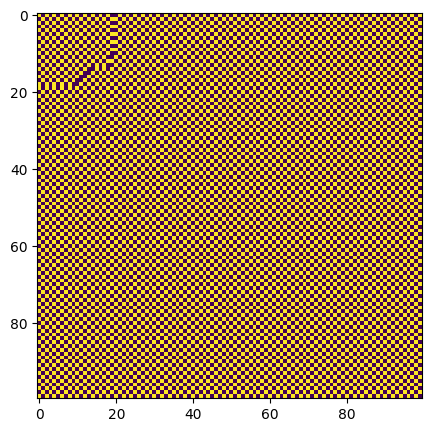

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(5,5))
pyplot.imshow(data)
pyplot.show()

Let us try Quantum Annealing!

***Note: Quantum Annealing ONLY optimizes a quadratic binary program, more complicated evolutions are not possible. It is a more limited form of quantum computing.*** *However, in theory slow enough evolution, makes it equal to quantum computing, but it is basically impossible to find the optimal evolution path and to know when we have annealed slowly enough to truely reach adiabatic quantum computing*

Classical Annealing: $Pr(\alpha) \approx e^{-\frac{\Delta}{k_{B}T}}$ vs
Quantum Annealing: $Pr(\alpha) \approx e^{-\frac{\sqrt{\Delta}w}{Γ}}$

For an $N$-spin glass system, $\Delta \approx O(N)$ implies an evolution time of $e^{\sqrt{N}}$ whereas for classical annealing it implies an evolution time of $e^{N}$.

In [ ]:
!pip install dwave-ocean-sdk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 35.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling n

In [ ]:
from dwave.system import LeapHybridSampler

One can create a free account at Dwave Ocean and copy the API key to use their Advantage Quantum Annealer for free!

In [ ]:
import os
dwave_ocean_api = "DEV-648f4916bfa0706429cbdd64b5e08c4847f505bd"
os.environ["DWAVE_API_TOKEN"] = dwave_ocean_api

In [ ]:
sa = LeapHybridSampler()
sampleset = sa.sample(bqm)
decoded_samples = model.decode_sampleset(sampleset)
best_sample = min(decoded_samples, key=lambda x: x.energy).sample

In [ ]:
data = [[0 for j in range(length)] for i in range(length)]
for key, value in best_sample.items():
  key = key[1:-1].strip() # Remove formatting
  x, y = key.split(",") # Get x & y index
  x, y = int(x) - 1, int(y) - 1
  data[x][y] = (-1)**(value)

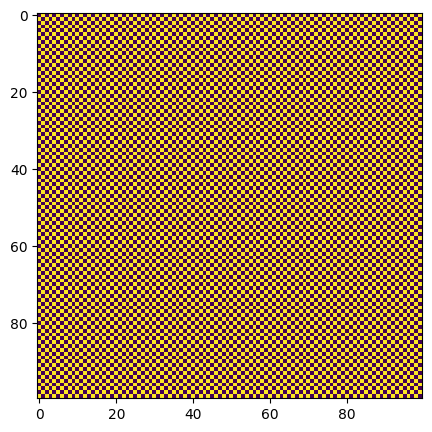

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(5,5))
pyplot.imshow(data)
pyplot.show()

As one can see, the Quantum Annealer found a better solution given a similar amount of compute time! We could of course increase the sampling of the Simulated Annealer (by allowing it to sample more solutions), but this advantage will always remain. Note: ***This is a property of the problem NOT of the Quantum Annealer; for other QUBO instances, it maybe slower***

In fact, solving a general 2D spin system is proven to be NP-complete. Does this mean solving a spin system imply a quantum computer can solve NP problems in polynomial time? NO! This just means the quantum computer can find *better* solutions, but nature does ***NOT*** find the optimum! Allowing even just a little bit of inoptimality allows one to get ***very*** close to a desirable solution.

Let us know look at QITE (Quantum imaginary time evolution)

**Main idea: What if time was imaginary?**

Suppose $H = \sum_{m = 1}^{N_{ham}} \hat{h}[m]$, i.e. our Hamiltonian is decomposable as local interaction.

Time Evolution of a Quantum State is of the form: $e^{-i\hat{H}t}$, suppose $\tau = -it \implies e^{-i\hat{H}(-it)} = e^{-\hat{H}\tau}$

Now, let us examine a decomposition across discrete time steps of our decomposed Hamiltonian ($\Delta \tau N_{step} = \tau$)

$e^{-\tau \hat{H}} = \prod_{n = 1}^{N_{step}} \prod_{m = 1}^{N_{ham}} e^{-\Delta \tau \hat{h}[m]} + \mathcal{O}(\Delta \tau^{2})$

***How does this help us?***

Instead of evolving cyclically, the system will now evolve with an exponential decay factor proportional to the energy of the state. Thus, low energy states becomes more and more likely to remain the most probable, achieving ***exponential seperation of the possible low energy solutions***!

***A disappointing realization: Unitary Evolution Restriction***

*Unfortunately*, life isn't that easy, we would need a quantum computer that could implement nonunitary transformations...which isn't possible. Solution: *Find the nearest unitary to the nonunitary transformation*

Find $A_{n}$ minimizing the residual norm: $||\frac{e^{-\Delta \tau \hat{h}[m]\psi_{n}}}{\sqrt{<\psi_{n}|e^{-2\Delta \tau \hat{h}[m]}|\psi_{n}>}} - e^{-i\Delta \tau \hat{A_{n}}[m]} |\psi_{n}>||^{2}$

***To begin: We need to re-express our Hamtiltonian as eigenvalue measurements in a specific basis, let us choose Z for ease of implementation***

In [6]:
!pip install docplex
!pip install qiskit[optimization]

In [2]:
from docplex.mp.model import Model
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization import QuadraticProgram
import numpy as np

In [10]:
length = 3
spins_to_connections, spins_to_Jgu = produce__uniform_2D_antiferromagnetic_square(length, -2, 1)

NameError: name 'produce__uniform_2D_antiferromagnetic_square' is not defined

In [ ]:
magneticField = np.array([0,0,1])

Unfortunately, IBM likes to do things in house, so we need to convert to DocPlex, IBM's optimization library

In [420]:
H = 0 # This will be our Hamiltonian
spins = [] # This will store our spins
for idx, neighbors in spins_to_connections.items(): # This creates our spins
  # 3x3 Square, so remainder and divisor gives us the 2D index
  idx_x = (idx // length) + 1
  idx_y = (idx % length) + 1
  spins.append(Spin("(" + str(idx_x) + ", " + str(idx_y) + ")"))
for idx, neighbors in spins_to_connections.items():
  # Now, we will add the Hamiltonian terms (note: we needed to initalize all spins first)
  [J, gu] = spins_to_Jgu[idx]
  H += -1 * magneticField[2] * gu * spins[idx]
  for neighbor in neighbors:
    H += -1 * spins[idx] * spins[neighbor] * J

In [11]:
model = H.compile()
qubo, offset = model.to_qubo()

AttributeError: 'int' object has no attribute 'compile'

In [ ]:
print(qubo)

Here is some code to convert between our dictionary mapping to vector/matrix formulation

In [423]:
def convert_dict_to_matrix(entry):
  matrix = np.array([[0 for j in range(length*length)] for i in range(length*length)])
  for key, value in entry.items():
    pair1, pair2 = key
    pair1 = pair1[1:-1].strip() # Remove formatting
    x1, y1 = pair1.split(",") # Get x & y index
    x1, y1 = int(x1) - 1, int(y1) - 1
    pair2 = pair2[1:-1].strip() # Remove formatting
    x2, y2 = pair2.split(",") # Get x & y index
    x2, y2 = int(x2) - 1, int(y2) - 1
    matrix[length*x1 + y1][length*x2 + y2] = value
    matrix[length*x2 + y2][length*x1 + y1] = value
  return matrix

In [424]:
quadratic = convert_dict_to_matrix(qubo)
print(quadratic)

[[ 14 -16   0 -16   0   0   0   0   0]
 [-16  22 -16   0 -16   0   0   0   0]
 [  0 -16  14   0   0 -16   0   0   0]
 [-16   0   0  22 -16   0 -16   0   0]
 [  0 -16   0 -16  30 -16   0 -16   0]
 [  0   0 -16   0 -16  22   0   0 -16]
 [  0   0   0 -16   0   0  14 -16   0]
 [  0   0   0   0 -16   0 -16  22 -16]
 [  0   0   0   0   0 -16   0 -16  14]]


In [425]:
def create_problem(mu: np.array, sigma: np.array, total: int = 3) -> QuadraticProgram:
    """Solve the quadratic program using docplex."""

    mdl = Model()
    x = [mdl.binary_var("x%s" % i) for i in range(len(sigma))]

    objective = 2 * mdl.sum(
        [sigma[i, j] * x[i] * x[j] for i in range(len(mu)) for j in range(len(mu))]
    )
    mdl.minimize(objective)
    cost = mdl.sum(x)

    qp = from_docplex_mp(mdl)
    return qp

In [426]:
qubo = create_problem([0 for i in range(length*length)], quadratic, 0)

In [427]:
print(qubo)

minimize 28*x0^2 - 64*x0*x1 - 64*x0*x3 + 44*x1^2 - 64*x1*x2 - 64*x1*x4 + 28*x2^2 - 64*x2*x5 + 44*x3^2 - 64*x3*x4 - 64*x3*x6 + 60*x4^2 - 64*x4*x5 - 64*x4*x7 + 44*x5^2 - 64*x5*x8 + 28*x6^2 - 64*x6*x7 + 44*x7^2 - 64*x7*x8 + 28*x8^2 (9 variables, 0 constraints, 'docplex_model11')


Now that we defined our quadratic program instance, we have to convert it to the language of our Pauli operators, luckily, Qiskit provides a "to_ising" function for this exact purpose, but it requires a QUBO instance due to the discritization of quantum computers

In [1]:
from qiskit_optimization.translators.ising import to_ising
from qiskit_optimization.converters import QuadraticProgramToQubo

C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [429]:
conv = QuadraticProgramToQubo()
qubo_final = conv.convert(qubo)
ising = to_ising(qubo_final)

Let us take a look at our observable ***Note, this should make sense, we are applying the energy operator by evaluating the expectation of each of our individual subhamiltonian by their appororiate weight***

In [430]:
print(ising[0])

18.0 * IIIIIIIIZ
- 16.0 * IIIIIIIZZ
+ 26.0 * IIIIIIIZI
- 16.0 * IIIIIIZZI
+ 18.0 * IIIIIIZII
- 16.0 * IIIIIZIIZ
+ 26.0 * IIIIIZIII
- 16.0 * IIIIZIIZI
+ 34.0 * IIIIZIIII
- 16.0 * IIIIZZIII
- 16.0 * IIIZIIZII
+ 26.0 * IIIZIIIII
- 16.0 * IIIZZIIII
- 16.0 * IIZIIZIII
+ 18.0 * IIZIIIIII
- 16.0 * IZIIZIIII
+ 26.0 * IZIIIIIII
- 16.0 * IZZIIIIII
- 16.0 * ZIIZIIIII
+ 18.0 * ZIIIIIIII
- 16.0 * ZZIIIIIII


Unfortunately, Qiskit has not ***yet*** implemented Imaginary Time evolution for their quantum devices, but we can at least see what it will produce by using a SciPy temporary implementation.

If we wanted to perform the algorithm, we could convert to another library or use a different optimization algorithm. I just find this one to be particularly cool and wanted to hightlight the optimization process.

In [34]:
from qiskit.algorithms.time_evolvers import SciPyImaginaryEvolver
from qiskit.algorithms.time_evolvers import TimeEvolutionProblem

We need to start with an initial guess, what guess is better than an uniform distribution?

Well, we could "warm-start" the optimization process by giving a good inital guess (weighted superposition of how "willing" the spins are to transition classically)

In [35]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator,StatevectorSimulator
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')

svsim = StatevectorSimulator() # Tell it which simulator you want to use
qc = QuantumCircuit(length*length)
for i in range(length*length):
  qc.h(i)

job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result() #Find the result
state = result.get_statevector() # Put the result into statevector form

Now, let us define the evolution problem and set evolution for $\tau = -0.31j$

In [36]:
time_evolve_problem = TimeEvolutionProblem(ising[0], 0.31, state)
simulated_evolver = SciPyImaginaryEvolver(1)

In [37]:
time_evolve = simulated_evolver.evolve(time_evolve_problem)

We can now extract the evolved state

In [38]:
evolved_state = time_evolve.evolved_state

Let us extract the highest expected classical observation

In [39]:
observed = (evolved_state.sample_counts(1000))

In [40]:
max_key = max(observed, key=observed.get)

In [41]:
print(max_key)

101010101


In [42]:
data = [[0 for j in range(length)] for i in range(length)]
for idx in range(len(max_key)):
  x, y = idx // length, idx % length
  data[x][y] = (-1)**(int(max_key[idx]))

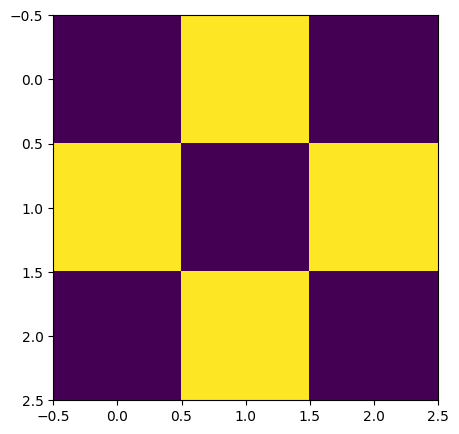

In [43]:
from matplotlib import pyplot
pyplot.figure(figsize=(5,5))
pyplot.imshow(data)
pyplot.show()

***NOTE: This is a LOT more information than we can get just by simply optimizing classically, we know the wavefunction! We could apply ANY desirable operator (supplement it called Aux_Ops) to see what the output would be on this wavefunction.***

We are *NOT* limited to only classically explainable systems, but we can now simulate some exotic matter like Spin Liquids!

Now, let us look at a quantum walk by using QAOA.

$H = \sum_{i=0}\sum_{j = 0}\sum_{k = 0}^{3} J_{i,j,k}\sigma_{j}^{k}\sigma_{i}^{k} \implies U = e^{-i\beta H}$

Like Quantum Annealing, we mix a Hamiltonian with our problem Hamiltonian. In fact, QAOA can be seen as a more controlled, discrete version of Quantum Annealing. Thus, we have a performance guarrentee if we evolve slowely enough!

Thus, $e^{-i\alpha H_{M}}e^{-i\beta H_{P}}$ for $H_{M}$ being our mixing Hamiltonian and $H_{P}$ being our problem Hamiltonian.

Why is this better? We can selectively choose to "accelerate" search in some regions and can more finely control the degree in which we move from our current solution set. In some sense, we have a better ability to balance our exploitation and exploration.

$e^{A + B} \approx (e^{\frac{A}{n}}e^{\frac{B}{n}})^{n}$ for large $n$. Thus, a natural problem form is to incrementally apply $e^{-iH_{M}\alpha_{i}}e^{-iH_{P}\beta_{i}}$, as we then mirror this process, called Trotterization, while maintaining our performance guarrentee if $\alpha_{i} = \beta_{i} = \frac{1}{n}$ for a large number of steps $n$.

In [ ]:
import math
import numpy as np

In [325]:
def produce__uniform_2D_antiferromagnetic_square(length, J, gu):
  neighbors = [[-1,0], [1,0], [0,-1], [0, 1]] # Possible 2D neighbors
  spins_to_connections = dict()
  spins_to_Jgu = dict()
  for i in range(length):
    for j in range(length):
      index = i*length + j # Formula for 2D index -> 1D index: (height*y + x)
      spins_to_connections[index] = []
      spins_to_Jgu[index] = [J, gu]
      for neighbor in neighbors:
        if(i + neighbor[0] >= 0 and i + neighbor[0] < length and
           j + neighbor[1] >= 0 and j + neighbor[1] < length):  # Check bounds
           new_index = (i + neighbor[0])*length + (j + neighbor[1])
           spins_to_connections[index].append(new_index)
  return spins_to_connections, spins_to_Jgu

length = 3
spins_to_connections, spins_to_Jgu = produce__uniform_2D_antiferromagnetic_square(length, -2, 1)

In [ ]:
from qiskit import Aer
from qiskit.result import QuasiDistribution
from qiskit.quantum_info import Pauli, Statevector
backend = Aer.get_backend('statevector_simulator')

We can divide our total Hamiltonian into multiple different smaller more localized ones

In [326]:
pauli_measurements = ising[0]

We have to rename the parameters as Qiskit names all QAOA oracles by the same indexing method

In [ ]:
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import QAOAAnsatz

In [ ]:
total_circuit = QuantumCircuit(9)
simulator = Aer.get_backend('statevector_simulator')

start = QuantumCircuit(9)

x = 0
for idx in range(0, len(pauli_measurements)-1, 2):
  local_hamiltonian = pauli_measurements[idx] + pauli_measurements[idx+1]
  ansatz = QAOAAnsatz(
            local_hamiltonian, 1
        ).decompose()  #

  new_parameters = [Parameter(f'θ{i}{x}') for i in range(ansatz.num_parameters)]
  ansatz.assign_parameters({old: new for old, new in zip(ansatz.parameters, new_parameters)}, inplace=True)
  start.append(ansatz, [i for i in range(9)])
  x += 1
ansatz = QAOAAnsatz(pauli_measurements, 2).decompose()
new_parameters = [Parameter(f'θ{i}{x}') for i in range(ansatz.num_parameters)]
ansatz.assign_parameters({old: new for old, new in zip(ansatz.parameters, new_parameters)}, inplace=True)
start.append(ansatz, [i for i in range(9)])

In [ ]:
start.draw()

┌────────────────┐┌────────────────┐┌────────────────┐┌────────────────┐»
q_0: ┤0               ├┤0               ├┤0               ├┤0               ├»
     │                ││                ││                ││                │»
q_1: ┤1               ├┤1               ├┤1               ├┤1               ├»
     │                ││                ││                ││                │»
q_2: ┤2               ├┤2               ├┤2               ├┤2               ├»
     │                ││                ││                ││                │»
q_3: ┤3               ├┤3               ├┤3               ├┤3               ├»
     │                ││                ││                ││                │»
q_4: ┤4 QAOA(θ00,θ10) ├┤4 QAOA(θ01,θ11) ├┤4 QAOA(θ02,θ12) ├┤4 QAOA(θ03,θ13) ├»
     │                ││                ││                ││                │»
q_5: ┤5               ├┤5               ├┤5               ├┤5               ├»
     │                ││                ││                ││                │»
q_6: ┤6               ├┤6               ├┤6               ├┤6               ├»
     │                ││                ││                ││                │»
q_7: ┤7               ├┤7               ├┤7               ├┤7               ├»
     │                ││                ││                ││                │»
q_8: ┤8               ├┤8               ├┤8               ├┤8               ├»
     └────────────────┘└────────────────┘└────────────────┘└────────────────┘»
«     ┌────────────────┐┌────────────────┐┌────────────────┐┌────────────────┐»
«q_0: ┤0               ├┤0               ├┤0               ├┤0               ├»
«     │                ││                ││                ││                │»
«q_1: ┤1               ├┤1               ├┤1               ├┤1               ├»
«     │                ││                ││                ││                │»
«q_2: ┤2               ├┤2               ├┤2               ├┤2               ├»
«     │                ││                ││                ││                │»
«q_3: ┤3               ├┤3               ├┤3               ├┤3               ├»
«     │                ││                ││                ││                │»
«q_4: ┤4 QAOA(θ04,θ14) ├┤4 QAOA(θ05,θ15) ├┤4 QAOA(θ06,θ16) ├┤4 QAOA(θ07,θ17) ├»
«     │                ││                ││                ││                │»
«q_5: ┤5               ├┤5               ├┤5               ├┤5               ├»
«     │                ││                ││                ││                │»
«q_6: ┤6               ├┤6               ├┤6               ├┤6               ├»
«     │                ││                ││                ││                │»
«q_7: ┤7               ├┤7               ├┤7               ├┤7               ├»
«     │                ││                ││                ││                │»
«q_8: ┤8               ├┤8               ├┤8               ├┤8               ├»
«     └────────────────┘└────────────────┘└────────────────┘└────────────────┘»
«     ┌────────────────┐┌────────────────┐┌────────────────────────────┐
«q_0: ┤0               ├┤0               ├┤0                           ├
«     │                ││                ││                            │
«q_1: ┤1               ├┤1               ├┤1                           ├
«     │                ││                ││                            │
«q_2: ┤2               ├┤2               ├┤2                           ├
«     │                ││                ││                            │
«q_3: ┤3               ├┤3               ├┤3                           ├
«     │                ││                ││                            │
«q_4: ┤4 QAOA(θ08,θ18) ├┤4 QAOA(θ09,θ19) ├┤4 QAOA(θ010,θ110,θ210,θ310) ├
«     │                ││                ││                            │
«q_5: ┤5               ├┤5               ├┤5                           ├
«     │                ││                ││                            │
«q_6: ┤6               ├┤6         

We can turn our Hamiltonian into a function which evaluates any arbitrary input state and returns its energy

In [ ]:
from qiskit.opflow import StateFn

H_statefn = StateFn(ising[0])

<ipython-input-43-ef6b49c141e5>:3: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  H_statefn = StateFn(ising[0])


The next block binds the parameters the optimizer suggests, runs the state function, evaluates the circuit, and gets the real valued expectation which gives the energy.

In [ ]:
# Define the cost function
def cost_function(params):
    """Cost function to be optimized."""
    # Assign the parameters
    parameter_dict = dict(zip(start.parameters, params))
    bound_circuit = start.bind_parameters(parameter_dict)

    # Convert the circuit to a state function
    circuit_statefn = StateFn(bound_circuit)

    # Measure the expectation value of H with the state produced by the circuit
    expectation = (~circuit_statefn @ H_statefn).eval()

    return expectation.real  # the expectation value is complex, but we're usually only interested in the real part

Now, we can call the COBYLA optimizer to find the optimal QAOA parameters to control its Quantum Walk.

In [ ]:
from qiskit.algorithms.optimizers import COBYLA

# Create the optimizer
optimizer = COBYLA(maxiter=500)

# Run the optimization
initial_params = [0.] * len(start.parameters)
result = optimizer.minimize(cost_function, initial_params)

print('Optimal parameters: ', result.x)
print('Optimal value: ', result.fun)

<ipython-input-44-f66ac8fdf24f>:9: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  circuit_statefn = StateFn(bound_circuit)


Optimal parameters:  [-4.99495195e-02 -4.49740891e-01 -2.24308592e-01  4.17728156e-03
  1.23132470e-03 -4.99120876e-03 -5.96338143e-02 -8.54048384e-02
  5.62153373e-02  3.47137219e-02  1.05310269e+00  9.51263834e-03
 -2.37684044e-03  1.04328883e+00  9.96077601e-01  9.85832653e-01
  1.00031693e+00  1.57911112e-03  3.16774257e-03  9.94238293e-01
 -7.29049801e-04  1.00132996e+00 -2.75243467e-03 -6.70191696e-03]
Optimal value:  -115.93278718599413


Let us now sample from the optimized quantum circuit.

In [ ]:
answer_mr = [0,0,1,0,1,0,1,0,1]

Now, let us plot the result!

In [ ]:
data = [[0 for j in range(3)] for i in range(3)]
for idx in range(len(answer_mr)):
  x_1, y_1 = idx // 3, idx % 3
  val = answer_mr[idx]
  data[x_1][y_1] = (-1)**(val)

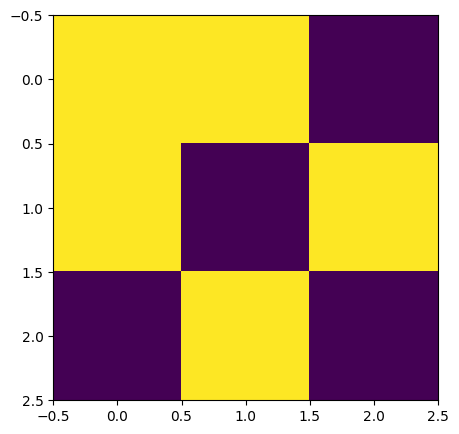

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(5,5))
pyplot.imshow(data)
pyplot.show()

As one can see, this circuit was likely overparameterized. Perhaps emulating local Hamiltonian interacts is simply not practical with QAOA as it is with QITE.

Now, let us add in Thermal effects, but, before that, let us dive into the theory a bit.

*Our key insight: Quantum thermal states* **evolve into our observed "ground" state at a finite temperature**. Thus, the problem reduces to changing our starting configuration to be biased in the way that would be expected at our desired temperature. As exponential decay is based on the relative energy represented by a potential state, ***any bias in the inital state will persist as the inital temperature bias is NOT caused by our Hamiltonian***.

Thermal Pure Quantum states are thus what we are after. $|\psi> = \sum_{i=1}^{2^{N}} c_{i} |i>$ represents our inital state.

Suppose one is at $T = \beta$, a Boltzmann distribution says that $|c_{i}|^{2} \approx e^{-\frac{E(c_{i})}{k\beta}}$

Thus, to reduce to the classical limit, a quantum thermal pure state should bias the inital state configuration such that these expectation values are observed.

Thus, we expect our states to follow: $|\beta, N> = e^{-\frac{H}{2\beta}}|\psi>$.


Now, such a state has been explored plenty of times before. Assuming phases and inital states are uniformly randomly distributed, one generates a state called a Harr-random pure state.

Now, $<A> = \frac{\text{Tr}(e^{-\beta H}A)}{\text{Tr}(e^{-\beta H})}$. As one, for a specific energy value, needs to normalize by the possibilities at that energy level and because the expectation is not directly the energy level but the observation of the operator $A$ in such a situation.

Trivially, one also has by its definition: $<A> = \frac{<\beta, N|A|\beta, N>}{<\beta, N||\beta, N>}$

The question now becomes mimicing the desired inital Haar-Random state. For a system of dimensionality $D$, one requires $2D$ unique 2-qubit interaction types to produce all coupling directions.

One can choose $L = \{RX(\frac{\pi}{2}), RY(\frac{\pi}{2}), T\}$, with the restriction that no gate can be choosen for a block consecutively.

This creates a random entangled state in the Hilbert space, with none of the operators commuting with each other. However, the thermal pure quantum state for a given Hamtilonian cannot be reached by just this randomization.

Now, that we got a a random circuit, one needs to evolve it by $e^{-\frac{H}{2\beta}}$. Luckily, this is just a rescaling of our Hamiltonian, so it is relatively easy to just change the inital statevector to be the pure quantum thermal state.

In [342]:
import random
qc = QuantumCircuit(9)

states = {0: [-1], 1: [-1], 2: [-1], 3: [-1], 4: [-1],
          5: [-1], 6: [-1], 7: [-1], 8: [-1]}


def add_layer():
  for i in range(9):
    found = False
    while(not found):
      val = random.randint(0,2)
      if(states[i][-1] != val):
        found = True
        if(val == 0):
          qc.rx(np.pi/2, i)
        else:
          if(val == 1):
            qc.ry(np.pi/2, i)
          else:
            qc.t(i)
        states[i] = states[i] + [val]

def add_a():
  for i in range(8):
    qc.cx(i, i + 1)

def add_b():
  for i in range(1, 8):
    qc.cx(i, i + 1)

def add_c():
  for i in range(9):
    if(i != (i + 3) % 9):
      qc.cx(i, (i + 3) % 9)

def add_d():
  for i in range(1,8):
    if(i != (i + 3) % 9):
      qc.cx(i, (i + 3) % 9)


for k in range(10):
  add_layer()
  qc.barrier()
  add_a()
  qc.barrier()
  add_layer()
  qc.barrier()
  add_b()
  qc.barrier()
  add_layer()
  qc.barrier()
  add_c()
  qc.barrier()
  add_layer()
  qc.barrier()
  add_d()
  qc.barrier()

In [343]:
qc.draw()

┌─────────┐ ░                                          ░ ┌─────────┐ ░ »
q_0: ┤ Ry(π/2) ├─░───■──────────────────────────────────────░─┤ Rx(π/2) ├─░─»
     └──┬───┬──┘ ░ ┌─┴─┐                                    ░ ├─────────┤ ░ »
q_1: ───┤ T ├────░─┤ X ├──■─────────────────────────────────░─┤ Ry(π/2) ├─░─»
     ┌──┴───┴──┐ ░ └───┘┌─┴─┐                               ░ └──┬───┬──┘ ░ »
q_2: ┤ Rx(π/2) ├─░──────┤ X ├──■────────────────────────────░────┤ T ├────░─»
     ├─────────┤ ░      └───┘┌─┴─┐                          ░ ┌──┴───┴──┐ ░ »
q_3: ┤ Ry(π/2) ├─░───────────┤ X ├──■───────────────────────░─┤ Rx(π/2) ├─░─»
     ├─────────┤ ░           └───┘┌─┴─┐                     ░ └──┬───┬──┘ ░ »
q_4: ┤ Rx(π/2) ├─░────────────────┤ X ├──■──────────────────░────┤ T ├────░─»
     ├─────────┤ ░                └───┘┌─┴─┐                ░ ┌──┴───┴──┐ ░ »
q_5: ┤ Ry(π/2) ├─░─────────────────────┤ X ├──■─────────────░─┤ Rx(π/2) ├─░─»
     ├─────────┤ ░                     └───┘┌─┴─┐           ░ ├─────────┤ ░ »
q_6: ┤ Rx(π/2) ├─░──────────────────────────┤ X ├──■────────░─┤ Ry(π/2) ├─░─»
     └──┬───┬──┘ ░                          └───┘┌─┴─┐      ░ ├─────────┤ ░ »
q_7: ───┤ T ├────░───────────────────────────────┤ X ├──■───░─┤ Rx(π/2) ├─░─»
     ┌──┴───┴──┐ ░                               └───┘┌─┴─┐ ░ └──┬───┬──┘ ░ »
q_8: ┤ Rx(π/2) ├─░────────────────────────────────────┤ X ├─░────┤ T ├────░─»
     └─────────┘ ░                                    └───┘ ░    └───┘    ░ »
«                                         ░    ┌───┐    ░                     »
«q_0: ────────────────────────────────────░────┤ T ├────░───■─────────────────»
«                                         ░    ├───┤    ░   │                 »
«q_1: ──■─────────────────────────────────░────┤ T ├────░───┼────■────────────»
«     ┌─┴─┐                               ░ ┌──┴───┴──┐ ░   │    │            »
«q_2: ┤ X ├──■────────────────────────────░─┤ Rx(π/2) ├─░───┼────┼────■───────»
«     └───┘┌─┴─┐                          ░ ├─────────┤ ░ ┌─┴─┐  │    │       »
«q_3: ─────┤ X ├──■───────────────────────░─┤ Ry(π/2) ├─░─┤ X ├──┼────┼────■──»
«          └───┘┌─┴─┐                     ░ ├─────────┤ ░ └───┘┌─┴─┐  │    │  »
«q_4: ──────────┤ X ├──■──────────────────░─┤ Rx(π/2) ├─░──────┤ X ├──┼────┼──»
«               └───┘┌─┴─┐                ░ └──┬───┬──┘ ░      └───┘┌─┴─┐  │  »
«q_5: ───────────────┤ X ├──■─────────────░────┤ T ├────░───────────┤ X ├──┼──»
«                    └───┘┌─┴─┐           ░ ┌──┴───┴──┐ ░           └───┘┌─┴─┐»
«q_6: ────────────────────┤ X ├──■────────░─┤ Rx(π/2) ├─░────────────────┤ X ├»
«                         └───┘┌─┴─┐      ░ ├─────────┤ ░                └───┘»
«q_7: ─────────────────────────┤ X ├──■───░─┤ Ry(π/2) ├─░─────────────────────»
«                              └───┘┌─┴─┐ ░ ├─────────┤ ░                     »
«q_8: ──────────────────────────────┤ X ├─░─┤ Ry(π/2) ├─░─────────────────────»
«                                   └───┘ ░ └─────────┘ ░                     »
«               ┌───┐           ░ ┌─────────┐ ░                          ┌───┐»
«q_0: ──────────┤ X ├───────────░─┤ Rx(π/2) ├─░──────────────────────────┤ X ├»
«               └─┬─┘┌───┐      ░ ├─────────┤ ░                          └─┬─┘»
«q_1: ────────────┼──┤ X ├──────░─┤ Ry(π/2) ├─░───■────────────────────────┼──»
«                 │  └─┬─┘┌───┐ ░ └──┬───┬──┘ ░   │                        │  »
«q_2: ────────────┼────┼──┤ X ├─░────┤ T ├────░───┼────■───────────────────┼──»
«                 │    │  └─┬─┘ ░    ├───┤    ░   │    │                   │  »
«q_3: ────────────┼────┼────┼───░────┤ T ├────░───┼────┼────■──────────────┼──»
«                 │    │    │   ░    ├───┤    ░ ┌─┴─┐  │    │              │  »
«q_4: ──■─────────┼────┼────┼───░────┤ T ├────░─┤ X ├──┼────┼────■─────────┼──»
«       │         │    │    │   ░ ┌──┴───┴──┐ ░ └───┘┌─┴─┐  │    │         │  »
«q_5: ──┼────■────┼────┼────┼───░─┤ Rx(π/2) ├─░──────┤ X ├──┼────┼────■────┼──»
«       │    │    │    │    │   ░ └──┬───┬─

In [344]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend=backend, shots=1, memory=True)
job_result = job.result()
statevector = job_result.get_statevector(qc)

In [ ]:
print(statevector)

Statevector([ 0.07040011+1.70491545e-02j, -0.02661591-9.14380003e-02j,
             -0.00239872-2.16942481e-03j,  0.00966864-4.19772184e-03j,
             -0.02577699-4.33287824e-02j, -0.00254773-6.89554282e-03j,
             -0.00608053-5.09456318e-02j,  0.04530028+3.81413776e-02j,
              0.00807259-1.84684718e-02j,  0.03183   -2.72092936e-02j,
             -0.03632493+6.06289635e-03j, -0.01758226+1.32059844e-02j,
             -0.03528027+1.08128637e-02j, -0.0125016 +2.75061364e-02j,
              0.00125067-1.61480300e-02j, -0.02447633+1.56062416e-02j,
              0.03979011+2.95178685e-02j,  0.00971664+4.00098169e-02j,
             -0.02554468+2.03312400e-02j,  0.00124153-2.15595090e-02j,
              0.01592896-4.99541394e-03j,  0.03617704+1.79114042e-02j,
             -0.03031058-9.25876932e-02j,  0.02962668-1.93712240e-02j,
              0.00665988+2.13503334e-03j, -0.01680839+1.24403617e-02j,
             -0.02225802+1.90523888e-02j,  0.0182454 +2.64001248e-02j,
      

In [ ]:
T = 2
modifiedH = ising[0] * (1/(2*T))

In [ ]:
time_evolve_problem = TimeEvolutionProblem(modifiedH, 0.10, statevector)
simulated_evolver = SciPyImaginaryEvolver(1)

In [ ]:
time_evolve_problem = TimeEvolutionProblem(modifiedH, 0.10, statevector)
simulated_evolver = SciPyImaginaryEvolver(1)
time_evolve = simulated_evolver.evolve(time_evolve_problem)
evolved_state = time_evolve.evolved_state

In [ ]:
observed = (evolved_state.sample_counts(1000))

In [ ]:
max_key = max(observed, key=observed.get)

In [ ]:
data = [[0 for j in range(length)] for i in range(length)]
for idx in range(len(max_key)):
  x, y = idx // length, idx % length
  data[x][y] = (-1)**(int(max_key[idx]))

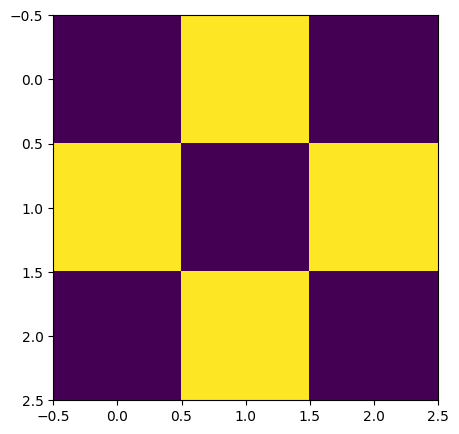

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(5,5))
pyplot.imshow(data)
pyplot.show()

In [ ]:
print(observed)

{'000000100': 1, '000001010': 3, '000010000': 1, '000010001': 4, '000010101': 14, '000100001': 1, '000100010': 5, '000100011': 2, '000101000': 1, '000101001': 1, '000101010': 40, '000101100': 1, '000101101': 1, '000110101': 1, '000111000': 1, '001000001': 2, '001000010': 1, '001000110': 1, '001010000': 3, '001010001': 57, '001010010': 5, '001010100': 15, '001010101': 9, '001011101': 1, '001100000': 2, '001100001': 1, '001100010': 4, '001100011': 4, '001100101': 2, '001100110': 1, '001101000': 3, '001101010': 18, '001110000': 3, '001110001': 3, '010000010': 2, '010000100': 1, '010001000': 1, '010001010': 13, '010001100': 69, '010001101': 10, '010001110': 5, '010010001': 4, '010010100': 4, '010010101': 3, '010100000': 1, '010100001': 4, '010100011': 17, '010100101': 2, '010101000': 38, '010101010': 82, '010101011': 11, '010101100': 2, '010101101': 1, '010101110': 9, '010101111': 1, '010110101': 1, '011000101': 1, '011001100': 1, '011010001': 2, '011010010': 1, '011010101': 6, '011100000'

**T = 10**

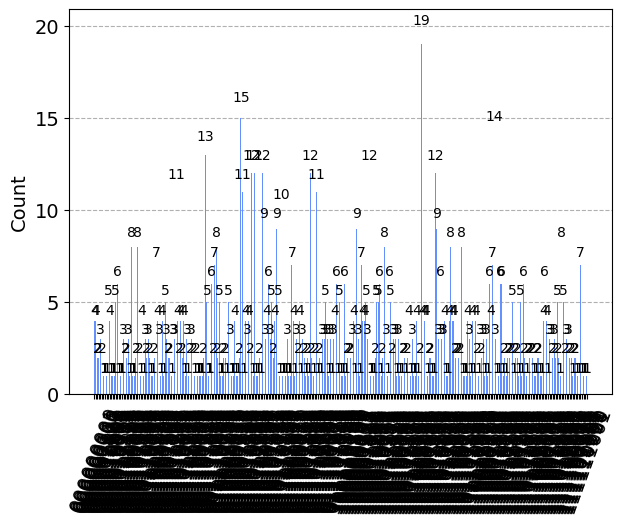

In [ ]:
import qiskit
qiskit.visualization.plot_histogram(observed)

**T = 2**

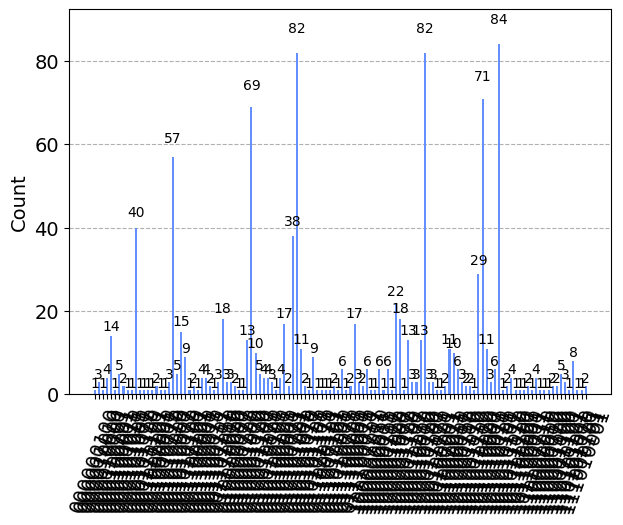

In [ ]:
import qiskit
qiskit.visualization.plot_histogram(observed)

**T = 1**

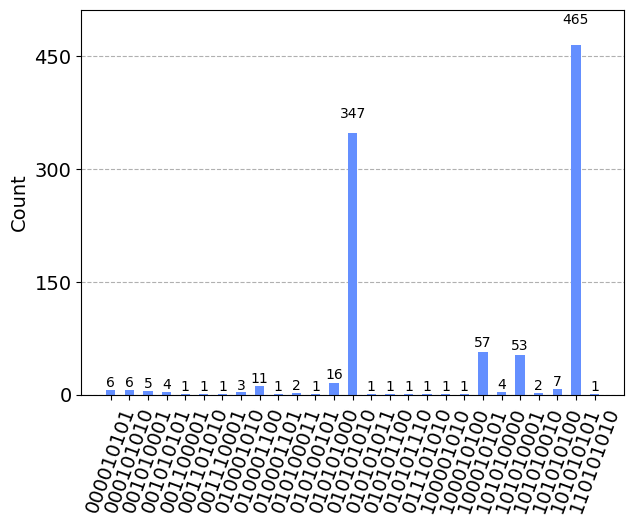

In [ ]:
import qiskit
qiskit.visualization.plot_histogram(observed)

Now, let us explore different, more interesting configurations:

In [5]:
spins_to_connections = dict()
spins_to_Jgu = dict()

In [2]:
def produce_frustrated_spin_3D_pyramid(J, gu):
  spins_to_connections = dict()
  spins_to_Jgu = dict()

  # Our "base" of our pyramid
  spins_to_Jgu[0] = [J, gu]
  spins_to_Jgu[1] = [J, gu]
  spins_to_Jgu[2] = [J, gu]
  # Our "top"
  spins_to_Jgu[3] = [J, gu]

  # Our constrained system
  # We should associate each pair of 3 with the other 4th 
  spins_to_connections[0] = [1,2,3]
  spins_to_connections[1] = [0,2,3]
  spins_to_connections[2] = [0,1,3]
  spins_to_connections[3] = [0,1,2]

  return spins_to_connections, spins_to_Jgu

spins_to_connections, spins_to_Jgu = produce_frustrated_spin_3D_pyramid(-2, 1)

In [72]:
def produce_frustrated_spin_heaxgonal(J, gu):
  spins_to_connections = dict()
  spins_to_Jgu = dict()
  spins_to_Jgu[0] = [J, gu]
  spins_to_Jgu[1] = [J, gu]
  spins_to_Jgu[2] = [J, gu]
  spins_to_Jgu[3] = [J, gu]
  spins_to_Jgu[4] = [J, gu]
  spins_to_Jgu[5] = [J, gu]
    
  # Hexagonal connections
  spins_to_connections[0] = [1,5]
  spins_to_connections[1] = [0,2]
  spins_to_connections[2] = [1,3]
  spins_to_connections[3] = [2,4]
  spins_to_connections[4] = [3,5]
  spins_to_connections[5] = [0,4]
    
  spins_to_connections[0].append((1 + 3) % 6)
  spins_to_connections[0].append((5 + 3) % 6)
  spins_to_connections[0].append((0 + 3) % 6)
    
  spins_to_connections[1].append((2 + 3) % 6)
  spins_to_connections[1].append((0 + 3) % 6)
  spins_to_connections[1].append((1 + 3) % 6)

  spins_to_connections[2].append((3 + 3) % 6)
  spins_to_connections[2].append((1 + 3) % 6)
  spins_to_connections[2].append((2 + 3) % 6)
    
  spins_to_connections[3].append((4 + 3) % 6)
  spins_to_connections[3].append((2 + 3) % 6)
  spins_to_connections[3].append((3 + 3) % 6)

  spins_to_connections[4].append((5 + 3) % 6)
  spins_to_connections[4].append((3 + 3) % 6)
  spins_to_connections[4].append((4 + 3) % 6)
    
  spins_to_connections[5].append((0 + 3) % 6)
  spins_to_connections[5].append((4 + 3) % 6)
  spins_to_connections[5].append((5 + 3) % 6)
    
  return spins_to_connections, spins_to_Jgu

spins_to_connections, spins_to_Jgu = produce_frustrated_spin_heaxgonal(-2, 1)

In [73]:
print(spins_to_connections)

{0: [1, 5, 4, 2, 3], 1: [0, 2, 5, 3, 4], 2: [1, 3, 0, 4, 5], 3: [2, 4, 1, 5, 0], 4: [3, 5, 2, 0, 1], 5: [0, 4, 3, 1, 2]}


In [74]:
print(spins_to_Jgu)

{0: [-2, 1], 1: [-2, 1], 2: [-2, 1], 3: [-2, 1], 4: [-2, 1], 5: [-2, 1]}


In [75]:
H = 0 # This will be our Hamiltonian
spins = [] # This will store our spins
for idx, neighbors in spins_to_connections.items(): # This creates our spins
  spins.append(Spin("(" + str(idx) + ")"))
for idx, neighbors in spins_to_connections.items():
  # Now, we will add the Hamiltonian terms (note: we needed to initalize all spins first)
  [J, gu] = spins_to_Jgu[idx]
  H += -1 * magneticField[2] * gu * spins[idx]
  for neighbor in neighbors:
    H += -1 * spins[idx] * spins[neighbor] * J

In [76]:
print(H)

((-1.000000 * Spin('(0)')) + (((-1.000000 * Spin('(0)')) * Spin('(1)')) * -2.000000) + (((-1.000000 * Spin('(0)')) * Spin('(5)')) * -2.000000) + (((-1.000000 * Spin('(0)')) * Spin('(4)')) * -2.000000) + (((-1.000000 * Spin('(0)')) * Spin('(2)')) * -2.000000) + (((-1.000000 * Spin('(0)')) * Spin('(3)')) * -2.000000) + (-1.000000 * Spin('(1)')) + (((-1.000000 * Spin('(1)')) * Spin('(0)')) * -2.000000) + (((-1.000000 * Spin('(1)')) * Spin('(2)')) * -2.000000) + (((-1.000000 * Spin('(1)')) * Spin('(5)')) * -2.000000) + (((-1.000000 * Spin('(1)')) * Spin('(3)')) * -2.000000) + (((-1.000000 * Spin('(1)')) * Spin('(4)')) * -2.000000) + (-1.000000 * Spin('(2)')) + (((-1.000000 * Spin('(2)')) * Spin('(1)')) * -2.000000) + (((-1.000000 * Spin('(2)')) * Spin('(3)')) * -2.000000) + (((-1.000000 * Spin('(2)')) * Spin('(0)')) * -2.000000) + (((-1.000000 * Spin('(2)')) * Spin('(4)')) * -2.000000) + (((-1.000000 * Spin('(2)')) * Spin('(5)')) * -2.000000) + (-1.000000 * Spin('(3)')) + (((-1.000000 * Sp

In [77]:
model = H.compile()
qubo, offset = model.to_qubo(index_label=True)

In [78]:
print(qubo)

{(1, 4): 16.0, (4, 4): -42.0, (0, 1): 16.0, (0, 2): 16.0, (2, 4): 16.0, (0, 3): 16.0, (2, 5): 16.0, (0, 4): 16.0, (1, 1): -42.0, (0, 5): 16.0, (1, 2): 16.0, (3, 4): 16.0, (1, 3): 16.0, (3, 5): 16.0, (1, 5): 16.0, (2, 3): 16.0, (4, 5): 16.0, (0, 0): -42.0, (2, 2): -42.0, (3, 3): -42.0, (5, 5): -42.0}


In [79]:
matrix = [[0 for i in range(6)] for j in range(6)]

In [80]:
for key, value in qubo.items():
  a, b = key
  matrix[a][b] = value
  matrix[b][a] = value

In [81]:
matrix = np.matrix(matrix)

In [82]:
print(matrix)

[[-42.  16.  16.  16.  16.  16.]
 [ 16. -42.  16.  16.  16.  16.]
 [ 16.  16. -42.  16.  16.  16.]
 [ 16.  16.  16. -42.  16.  16.]
 [ 16.  16.  16.  16. -42.  16.]
 [ 16.  16.  16.  16.  16. -42.]]


In [83]:
def create_problem(mu: np.array, sigma: np.array, total: int = 3) -> QuadraticProgram:
    """Solve the quadratic program using docplex."""

    mdl = Model()
    x = [mdl.binary_var("x%s" % i) for i in range(len(sigma))]

    objective = 2 * mdl.sum(
        [sigma[i, j] * x[i] * x[j] for i in range(len(mu)) for j in range(len(mu))]
    )
    mdl.minimize(objective)
    cost = mdl.sum(x)

    qp = from_docplex_mp(mdl)
    return qp

In [84]:
qubo = create_problem([0 for i in range(6)], matrix, 0)

In [85]:
print(qubo)

minimize -84*x0^2 + 64*x0*x1 + 64*x0*x2 + 64*x0*x3 + 64*x0*x4 + 64*x0*x5 - 84*x1^2 + 64*x1*x2 + 64*x1*x3 + 64*x1*x4 + 64*x1*x5 - 84*x2^2 + 64*x2*x3 + 64*x2*x4 + 64*x2*x5 - 84*x3^2 + 64*x3*x4 + 64*x3*x5 - 84*x4^2 + 64*x4*x5 - 84*x5^2 (6 variables, 0 constraints, 'docplex_model3')


In [86]:
from qiskit_optimization.translators.ising import to_ising
from qiskit_optimization.converters import QuadraticProgramToQubo

In [87]:
conv = QuadraticProgramToQubo()
qubo_final = conv.convert(qubo)
ising = to_ising(qubo_final)

In [88]:
print(ising[0])

-38.0 * IIIIIZ
+ 16.0 * IIIIZZ
- 38.0 * IIIIZI
+ 16.0 * IIIZIZ
- 38.0 * IIIZII
+ 16.0 * IIIZZI
+ 16.0 * IIZIIZ
- 38.0 * IIZIII
+ 16.0 * IIZIZI
+ 16.0 * IIZZII
+ 16.0 * IZIIIZ
- 38.0 * IZIIII
+ 16.0 * IZIIZI
+ 16.0 * IZIZII
+ 16.0 * IZZIII
+ 16.0 * ZIIIIZ
- 38.0 * ZIIIII
+ 16.0 * ZIIIZI
+ 16.0 * ZIIZII
+ 16.0 * ZIZIII
+ 16.0 * ZZIIII


In [89]:
from qiskit.algorithms.time_evolvers import SciPyImaginaryEvolver
from qiskit.algorithms.time_evolvers import TimeEvolutionProblem

In [90]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator,StatevectorSimulator
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')

svsim = StatevectorSimulator() # Tell it which simulator you want to use
qc = QuantumCircuit(6)
for i in range(6):
  qc.h(i)

job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result() #Find the result
state = result.get_statevector() # Put the result into statevector form

In [91]:
time_evolve_problem = TimeEvolutionProblem(ising[0], 0.5, state)
simulated_evolver = SciPyImaginaryEvolver(1)

In [92]:
time_evolve = simulated_evolver.evolve(time_evolve_problem)

In [93]:
evolved_state = time_evolve.evolved_state

In [94]:
print(evolved_state)

Statevector([6.73971157e-24+0.j, 1.17222115e-05+0.j, 1.17222115e-05+0.j,
             2.58198890e-01+0.j, 1.17222115e-05+0.j, 2.58198890e-01+0.j,
             2.58198890e-01+0.j, 7.20237564e-11+0.j, 1.17222115e-05+0.j,
             2.58198890e-01+0.j, 2.58198890e-01+0.j, 7.20237564e-11+0.j,
             2.58198890e-01+0.j, 7.20237564e-11+0.j, 7.20237564e-11+0.j,
             2.54433180e-34+0.j, 1.17222115e-05+0.j, 2.58198890e-01+0.j,
             2.58198890e-01+0.j, 7.20237564e-11+0.j, 2.58198890e-01+0.j,
             7.20237564e-11+0.j, 7.20237564e-11+0.j, 2.54433180e-34+0.j,
             2.58198890e-01+0.j, 7.20237564e-11+0.j, 7.20237564e-11+0.j,
             2.54433180e-34+0.j, 7.20237564e-11+0.j, 2.54433180e-34+0.j,
             2.54433180e-34+0.j, 1.13829776e-71+0.j, 1.17222115e-05+0.j,
             2.58198890e-01+0.j, 2.58198890e-01+0.j, 7.20237564e-11+0.j,
             2.58198890e-01+0.j, 7.20237564e-11+0.j, 7.20237564e-11+0.j,
             2.54433180e-34+0.j, 2.58198890e-01+0.j

In [95]:
observed = (evolved_state.sample_counts(10000))

In [96]:
print(observed)

{'000011': 707, '000101': 697, '000110': 638, '001001': 658, '001010': 676, '001100': 659, '010001': 665, '010010': 665, '010100': 630, '011000': 683, '100001': 625, '100010': 651, '100100': 684, '101000': 684, '110000': 678}


In [97]:
print(len(observed))

15


In [98]:
import numpy as np
import networkx as nx
import plotly.graph_objects as go
from IPython.display import clear_output
import time

def create_graph_from_adj_matrix(matrix):
    rows, cols = np.where(matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    return gr

def plot_3D_graph(matrix):
    G = create_graph_from_adj_matrix(matrix)
    pos = nx.spring_layout(G, dim=3, seed=42)

    edge_x = []
    edge_y = []
    edge_z = []
    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    node_z = []
    for node in G.nodes():
        x, y, z = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_z.append(0)

    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append('# of connections: '+str(len(adjacencies[1])))

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
    fig.show()

In [99]:
base_matrix = np.ones((6,6))

In [100]:
base_matrix[0][0] = 0; base_matrix[1][1] = 0; base_matrix[2][2] = 0; base_matrix[3][3] = 0; base_matrix[4][4] = 0; base_matrix[5][5] = 0

In [101]:
print(base_matrix.tolist())

[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 0.0]]


In [102]:
import time
from IPython.display import clear_output

In [ ]:
plots = []

while(1 == 1):
    for key, value in observed.items():
      if(value > 10):
        base_matrix_copy = base_matrix.tolist()
        idx = 0
        for item in key:
            if(int(item) == 0):
                base_matrix_copy[idx][idx] = -1 if item == "1" else 1.0
            idx += 1
        plot_3D_graph(np.matrix(base_matrix_copy))
        time.sleep(5)  # Pause for 2 seconds between plots
        clear_output(wait=True)

## Notice, with periodic boundry conditions, one has to choose 2 of the 6 items to be opposing as any more or less implies more conflicts and having less than 4 be alligned with the field is always inoptimal.

Now, let us identify the magnetic suspetibility as a function of temperature. First, rerun the cells in this notebook corresponding to the 3x3 antiferromagnetic square and the above ones for the Harr random statevector.

In [417]:
spins_to_connections, spins_to_Jgu = produce__uniform_2D_antiferromagnetic_square(length, 2, 1)

In [443]:
T = np.arange(0.05, 7, 0.1)

In [444]:
chis = []
for t in T:
    print("Working on T = ", t)
    modifiedH = ising[0] * (1/(2*t))
    time_evolve_problem = TimeEvolutionProblem(modifiedH, 0.05, statevector)
    simulated_evolver = SciPyImaginaryEvolver(1)
    time_evolve = simulated_evolver.evolve(time_evolve_problem)
    evolved_state = time_evolve.evolved_state
    observed = (evolved_state.sample_counts(500))
    chi = 0
    for key, value in observed.items():
        chi += (key.count("1") / len(key)) * value
        chi -= (key.count("0") / len(key)) * value
    chi /= 500
    print(chi)
    chis.append(chi)

Working on T =  0.05
1.0
Working on T =  0.15000000000000002
1.0
Working on T =  0.25000000000000006
1.0
Working on T =  0.35000000000000003
1.0
Working on T =  0.45000000000000007
1.0
Working on T =  0.5500000000000002
1.0
Working on T =  0.6500000000000001
0.9986666666666666
Working on T =  0.7500000000000002
0.9964444444444445
Working on T =  0.8500000000000002
0.9888888888888889
Working on T =  0.9500000000000002
0.9733333333333334
Working on T =  1.0500000000000003
0.9626666666666667
Working on T =  1.1500000000000004
0.9457777777777777
Working on T =  1.2500000000000002
0.9297777777777777
Working on T =  1.3500000000000003
0.9262222222222223
Working on T =  1.4500000000000004
0.8835555555555554
Working on T =  1.5500000000000003
0.8635555555555554
Working on T =  1.6500000000000004
0.8359999999999999
Working on T =  1.7500000000000004
0.8195555555555556
Working on T =  1.8500000000000003
0.8088888888888887
Working on T =  1.9500000000000004
0.7911111111111111
Working on T =  2.05

In [445]:
print(chis)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9986666666666666, 0.9964444444444445, 0.9888888888888889, 0.9733333333333334, 0.9626666666666667, 0.9457777777777777, 0.9297777777777777, 0.9262222222222223, 0.8835555555555554, 0.8635555555555554, 0.8359999999999999, 0.8195555555555556, 0.8088888888888887, 0.7911111111111111, 0.7715555555555552, 0.7613333333333331, 0.7279999999999996, 0.688444444444444, 0.6857777777777777, 0.6764444444444443, 0.6311111111111108, 0.6217777777777771, 0.6306666666666663, 0.6057777777777775, 0.5560000000000002, 0.567555555555555, 0.5448888888888886, 0.510222222222222, 0.49022222222222217, 0.4928888888888888, 0.4808888888888888, 0.4608888888888887, 0.46844444444444433, 0.4488888888888887, 0.42222222222222194, 0.4248888888888888, 0.40933333333333316, 0.3928888888888885, 0.38533333333333325, 0.3693333333333333, 0.3475555555555556, 0.33200000000000013, 0.37644444444444436, 0.36933333333333346, 0.31244444444444447, 0.3093333333333331, 0.3168888888888889, 0.29733333333333345, 0.

In [446]:
import matplotlib.pyplot as plt

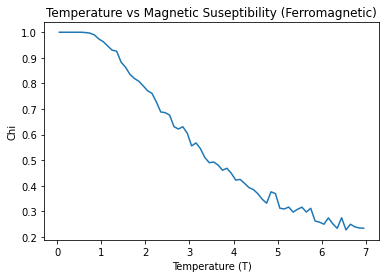

In [448]:
plt.plot(T, chis)
plt.xlabel("Temperature (T)")
plt.ylabel("Chi")
plt.title("Temperature vs Magnetic Suseptibility (Ferromagnetic)")
plt.show()